In [0]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Loading Data from rar file

In [5]:
file = "/content/drive/My Drive/digits.rar"
!pip install rarfile
!pip install patool
from patoolib import extract_archive
import os
extract_to = 'data'
os.mkdir(extract_to) 
extract_archive(file, outdir=extract_to)

patool: Extracting /content/drive/My Drive/digits.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/digits.rar"
patool:     with cwd='data'
patool: ... /content/drive/My Drive/digits.rar extracted to `data'.


'data'

#Preprossing DataSet

In [0]:
data_dir = '/content/data/digits'

In [7]:
os.listdir(data_dir)

['train', 'test']

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [0]:

test_path = data_dir+"/test/"
train_path = data_dir+"/train/"

In [10]:
os.listdir(test_path)

['3', '5', '6', '7', '9', '1', '2', '4', '8']

In [12]:
num_classes = len(os.listdir(train_path))
num_classes

9

In [13]:
os.listdir(train_path+'4')[0]

'tmpf3o4tvkb.png'

In [0]:
image_1_file_location =train_path+'4/'+ 'tmpf3o4tvkb.png'

In [15]:
image_1_file_location

'/content/data/digits/train/4/tmpf3o4tvkb.png'

In [16]:
imread(image_1_file_location).shape

(28, 28)

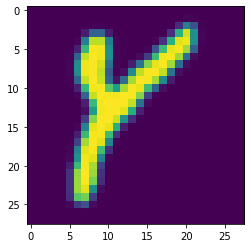

In [17]:
plt.imshow(imread(image_1_file_location))

In [0]:
image_shape = (28,28,1)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

In [21]:
image_gen.flow_from_directory(train_path)

Found 50861 images belonging to 9 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout

In [0]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))


model.add(Conv2D(256, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
#26 is the #of classes
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [0]:
batch_size = 256

In [27]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 50861 images belonging to 9 classes.


In [28]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=image_shape[:2],
                                                color_mode='grayscale',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                               shuffle=False)

Found 461 images belonging to 9 classes.


In [29]:
train_image_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}

In [47]:
results = model.fit(train_image_gen,
                              epochs=20,
                             validation_data=test_image_gen,
                             callbacks=[early_stop],
                    )

Epoch 1/20
199/199 [==============================] - 35s 175ms/step - loss: 1.1604 - acc: 0.6253 - val_loss: 2.2925 - val_acc: 0.1735
Epoch 2/20
199/199 [==============================] - 34s 170ms/step - loss: 0.2138 - acc: 0.9332 - val_loss: 2.2337 - val_acc: 0.2408
Epoch 3/20
199/199 [==============================] - 33s 167ms/step - loss: 0.1392 - acc: 0.9567 - val_loss: 1.9784 - val_acc: 0.3557
Epoch 4/20
199/199 [==============================] - 33s 168ms/step - loss: 0.1130 - acc: 0.9649 - val_loss: 1.8692 - val_acc: 0.3557
Epoch 5/20
199/199 [==============================] - 33s 166ms/step - loss: 0.0974 - acc: 0.9680 - val_loss: 1.6734 - val_acc: 0.4425
Epoch 6/20
199/199 [==============================] - 33s 168ms/step - loss: 0.0912 - acc: 0.9721 - val_loss: 1.6127 - val_acc: 0.4425
Epoch 7/20
199/199 [==============================] - 33s 167ms/step - loss: 0.0812 - acc: 0.9741 - val_loss: 1.4393 - val_acc: 0.5141
Epoch 8/20
199/199 [==============================] - 3

#Model Evaluation

In [0]:
test_image_gen.reset()

In [49]:
model.evaluate_generator(test_image_gen)

[0.8604588210582733, 0.73752713]

In [0]:
test_image_gen.reset()

In [51]:
scores = model.evaluate(test_image_gen, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
print("CNN Acuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 186ms/step - loss: 0.8501 - acc: 0.7375
CNN Error: 26.25%
CNN Acuracy: 73.75%


In [52]:
pred= model.predict_generator(test_image_gen)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_image_gen.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]
print(predicted_class_indices)
print (labels)
print (predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 3 0 0 0 0 8 0 0 0 0
 8 1 0 0 0 0 0 3 3 0 0 0 1 1 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 7 1 2 4 1 1 1 1 1 3 1 3 4 1
 1 1 2 1 1 1 1 1 3 1 1 1 1 5 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 1 1
 6 3 1 1 1 5 3 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 3 2 2 2 4 1 2 2 2 1 1 5 3 2 1
 2 2 3 2 2 7 7 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 1 4 4 2 2 2 2 2 5 2
 2 2 6 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 5 4 2 4 4 4 4 4 2 4 4 4
 1 2 4 4 4 3 4 2 2 4 3 2 4 4 4 4 5 5 3 5 1 5 5 5 4 4 5 5 5 5 3 5 5 3 5 5 7
 6 3 1 3 6 2 3 2 0 0 0 6 6 6 6 6 6 6 6 7 2 8 7 7 1 7 7 7 8 7 2 7 7 7 7 3 7
 7 7 7 2 7 7 7 2 2 7 7 7 2 7 7 8 1 3 1 1 1 1 7 2 7 2 7 8 2 3 7 7 7 7 7 7 8
 8 8 8 8 8 8 3 1 2 8 3 3 8 8 8 8 8 3 8 8 3 8 8 8 8 8 8 3 8 3 7 8 8 0 8 8 8
 8 8 8 8 8 8 8 3 8 8 3 8 3 8 8 8 8]
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7,

In [53]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(predicted_class_indices, test_image_gen.classes))

[[80  0  0  0  0  0  3  0  1]
 [ 4 47  9  0  1  1  1  6  1]
 [ 1  4 50  0  7  0  2  9  1]
 [ 6  6  5 54  2  3  3  3 10]
 [ 0  2  3  0 17  3  0  0  0]
 [ 0  2  2  0  1 14  0  0  0]
 [ 1  1  1  0  0  0 10  0  0]
 [ 0  1  2  0  0  0  1 32  1]
 [ 2  0  0  0  0  0  0  4 41]]


In [54]:
print(classification_report(test_image_gen.classes,predicted_class_indices))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        94
           1       0.67      0.75      0.71        63
           2       0.68      0.69      0.68        72
           3       0.59      1.00      0.74        54
           4       0.68      0.61      0.64        28
           5       0.74      0.67      0.70        21
           6       0.77      0.50      0.61        20
           7       0.86      0.59      0.70        54
           8       0.87      0.75      0.80        55

    accuracy                           0.75       461
   macro avg       0.76      0.71      0.72       461
weighted avg       0.77      0.75      0.75       461



#Manual Testing

In [0]:
from tensorflow.keras.preprocessing import image

In [56]:
my_image = image.load_img(image_1_file_location,target_size=image_shape,grayscale=True)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [57]:
my_image

In [58]:
my_image_arr = image.img_to_array(my_image)
my_image_arr.shape

(28, 28, 1)

In [0]:
my_image_arr = np.expand_dims(my_image_arr,axis=0)
#my_image_arr

In [60]:
model.predict_classes(my_image_arr)

array([3])

In [61]:
train_image_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}

#Predictions

In [0]:
p = model.predict_classes(my_image_arr)

In [0]:
print(f"Predicted Label is {labels2[p[0]]}")

#Saving the Model

In [0]:
!mkdir -p saved_model
model.save('saved_model/my_aplha2')